# Read Latency Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data with correct delimiter
data = pd.read_csv('/content/readLatency.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Now you can use this model to predict read latency for new data
# For example, if you want to predict read latency for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [1024]
})
# Calculate accuracy on training data
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Predicting read latency for new data
predicted_read_latency = model.predict(new_data)
print("Predicted Read Latency:", predicted_read_latency)


Training Accuracy: 0.8353391605136722
Predicted Read Latency: [[41214.355   58620.294   42644.553   63540.72    44939.262   68461.209
  47231.573   73381.618   45516.239   78302.107   46197.608   83222.536
  46881.538   85495.261   34117.012   24903.502   35616.749   24529.788
  37116.532   24676.691   38616.312   24823.517   40116.032   24967.859
  41615.832   25112.138   44004.984    8906.5588   4508.1733   9282.7817
   4535.6196   9656.4517   4563.0676  10032.6746   4590.5159  10406.3429
   4615.3904  10782.5658   4550.5892    157.56018]]


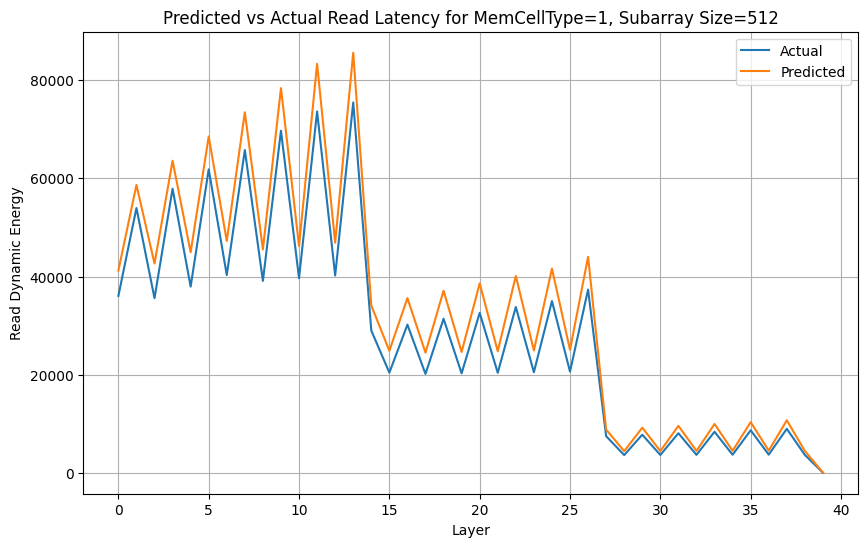

In [ ]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual rRead Latency values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted Read Latency and the actual Read Latency values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_read_latency[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('Read Dynamic Energy')
plt.title(f'Predicted vs Actual Read Latency for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.8356521387720888


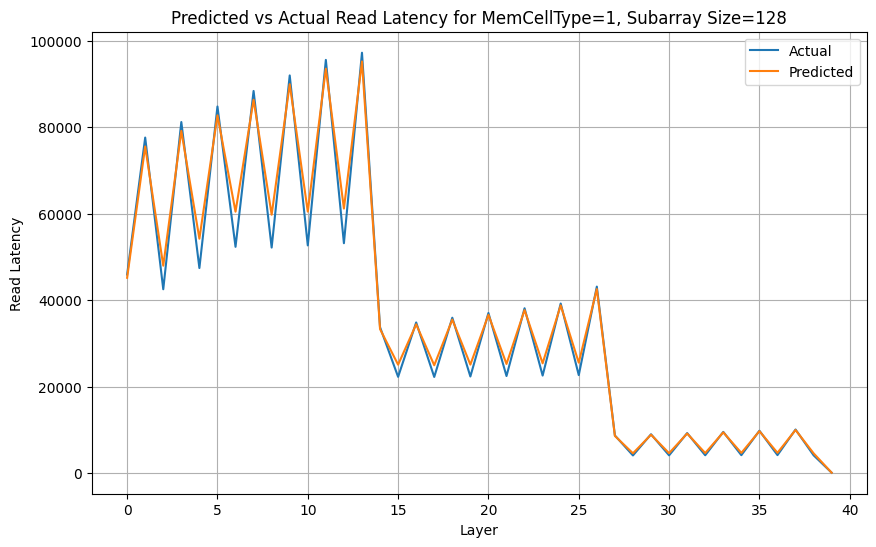

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/readLatency.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X_train, y_train)

# Predicting read latency for the testing data
predicted_read_latency_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual read latency values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual read latency values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual read latency values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_read_latency_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('Read Latency')
    plt.title(f'Predicted vs Actual Read Latency for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data with correct delimiter
data = pd.read_csv('/content/readLatency.csv', delimiter=',')

# Selecting columns by position
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
layer_number = 1  # Specify the layer number for which you want to predict read latency
y = data[f'Layer{layer_number}']  # Target variable: read latency for the specified layer

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Now you can use this model to predict read latency for new data
# For example, if you want to predict read latency for MemCellType=1, numRowSubArray/numColSubArray=64
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [2048]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy for Layer {layer_number}: {training_accuracy}")


# Predicting read latency for the specified layer and new data
predicted_read_latency = model.predict(new_data)
print(f"Predicted Read Latency for Layer {layer_number}:", predicted_read_latency)


Training Accuracy for Layer 1: 0.870354741671111
Predicted Read Latency for Layer 1: [41276.141]
